# library section 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read file and ignore bad lines with delimiter 
comments=pd.read_csv(r"E:\datasets\Youtube_project\UScomments.csv",error_bad_lines=False)

C:\Users\mo\AppData\Local\Temp\ipykernel_19520\396030268.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  comments=pd.read_csv(r"E:\datasets\Youtube_project\UScomments.csv",error_bad_lines=False)
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\mo\AppData\Local\Temp\ipykernel_19520\396030268.py:2: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments=pd.read_csv(r"E:\datasets\Youtube_project\UScomments.csv",error_bad_lines=False)


In [3]:
#overview 
comments.head(10)

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   
5  XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   
6  XpVt6Z1Gjjo                               The end though 😭👍🏻❤️     4   
7  XpVt6Z1Gjjo                               #1 trending!!!!!!!!!     3   
8  XpVt6Z1Gjjo                        Happy one year vlogaversary     3   
9  XpVt6Z1Gjjo  You and your shit brother may have single hand...     0   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  
7       0  
8       0  
9       0

In [4]:
#check if null value 
comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [5]:
#remove all null value fom dataframe
comments.dropna(inplace=True)
print(comments.shape)

(691375, 4)


# sentiment analysis section by (textblob)

In [6]:
# install and import textblob to analysis sentimental of commenter in videos 
# !pip install textblob

In [7]:
from textblob import TextBlob

In [8]:
#here polarity is how much this words postive or negative its between  [-1,1] if negative its mins - and postive is plus 
#mean of subjectivity its have human  feeling or no(i love my son ) its have feeling its subjevtivity   
#but if it (i play games) have no feeling no subjectivity in it 

In [9]:
TextBlob("i love this person and hate her son").sentiment


Sentiment(polarity=-0.15000000000000002, subjectivity=0.75)

In [10]:
#if we need polarity only 
TextBlob("i love this person and hate her son").sentiment.polarity

-0.15000000000000002

In [11]:
polarity=[]
for c in comments["comment_text"]:

    try:
        polarity.append( TextBlob(c).sentiment.polarity)
    except:
        polarity.append(0)

In [12]:
#here we add column ant it name polarity and get all value for every comment
comments["polarity"]=polarity
comments.head(10)

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   
5  XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   
6  XpVt6Z1Gjjo                               The end though 😭👍🏻❤️     4   
7  XpVt6Z1Gjjo                               #1 trending!!!!!!!!!     3   
8  XpVt6Z1Gjjo                        Happy one year vlogaversary     3   
9  XpVt6Z1Gjjo  You and your shit brother may have single hand...     0   

  replies  polarity  
0       0  0.000000  
1       0  0.000000  
2       0  0.000000  
3       0  0.000000  
4       0  0.000000  
5       0  0.000000  
6       0  0.000000  
7       0  0.000000  
8       0  0.800000  
9       0 -0.135714

# wordcloud for  positive and negative  sentences 

In [13]:
#fillter data 
#frist get negative and positive value df
pos_comments=comments[comments["polarity"]==1]
neg_comments=comments[comments["polarity"]==-1]
neg_comments.head()

video_id                                       comment_text likes  \
512   8wNr-NQImFg  BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...     0   
562   8wNr-NQImFg  Well… The brain surgeon Ben Carson just proved...     0   
952   Ayb_2qbZHm4         WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!     0   
1371  vu_9muoxT50                                     WTF BRUH!!!!!!     0   
1391  vu_9muoxT50                    cheeseus christ thats insane!!!     0   

     replies  polarity  
512        0      -1.0  
562        0      -1.0  
952        0      -1.0  
1371       0      -1.0  
1391       0      -1.0

In [14]:
pos_comments.head()


video_id                                       comment_text likes  \
64   XpVt6Z1Gjjo                                    yu are the best     1   
156  cLdxuaxaQwc  Power is the disease.  Care is the cure.  Keep...     0   
227  WYYvHb03Eog  YAS Can't wait to get it! I just need to sell ...     0   
307  sjlHnJvXdQs                                  This is priceless     0   
319  sjlHnJvXdQs                                Summed up perfectly     0   

    replies  polarity  
64        0       1.0  
156       0       1.0  
227       0       1.0  
307       0       1.0  
319       0       1.0

In [15]:
#after we filtter it we need now to install wordcloud 
# !pip install wordcloud


In [16]:
from wordcloud import WordCloud ,STOPWORDS

In [17]:
#we need to join all comment in one pragraph to make wordcloud to it 
com_words_positive=" ".join(pos_comments["comment_text"])

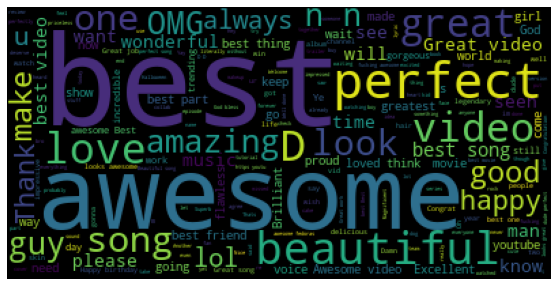

In [18]:
#now we can make wordcloud to positve comment 
# print(STOPWORDS)
#STOPWORD this word not affect in our analysis like(he him our ) and so on u can print it and see 
wordcloud_img=WordCloud(stopwords=set(STOPWORDS)).generate(com_words_positive)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud_img)
plt.axis("off")
plt.show()


In [19]:
com_words_negative=" ".join(neg_comments["comment_text"])

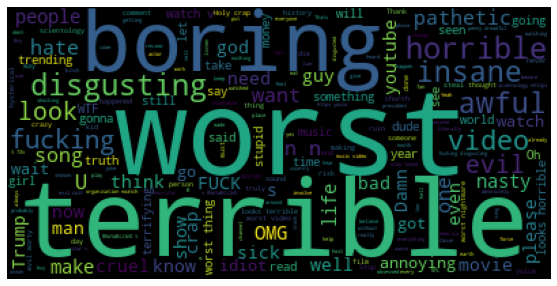

In [20]:
#now we can make wordcloud to negative comment 
# print(STOPWORDS)
#STOPWORD this word not affect in our analysis like(he him our ) and so on u can print it and see 
wordcloud_img=WordCloud(stopwords=set(STOPWORDS)).generate(com_words_negative)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud_img)
plt.axis("off")
plt.show()


# setion of emoji analysis in comments

In [21]:
#insall emoji and impoert it 
# !pip install emoji
import  emoji

In [22]:
#we need to check evry char in comment in comments_text make nested loop
emoji_in_commemts=[]
for comment in comments["comment_text"]:
    for c in comment:
        if c in emoji.UNICODE_EMOJI_ENGLISH:
            emoji_in_commemts.append(c)
len(emoji_in_commemts)

294549

In [23]:
#we need to collect and count number of emojis in our data
from collections import Counter
#here we get top 10 common in data 
emojis=Counter(emoji_in_commemts).most_common(10)


In [24]:
#store emojis and it freq 
emojis_shape=[emojis[s][0] for s in range(10) ]


emojis_freq=[emojis[s][1] for s in range(10)]
        

In [25]:
# inistall ploty 
# !pip install plotly

In [26]:
#import plotly and make bar 
import  plotly.graph_objs as go
from plotly.offline import iplot

In [27]:
#frequncey of most used emojis
trace=go.Bar(x=emojis_shape,y=emojis_freq)
iplot([trace])

In [28]:
#how to merge and concatenate csv files from our os 
import os 
#get our path that have scv files
path=r"E:\datasets\Youtube_project\additional_data"
#get list of file 
file_list=os.listdir(path)
#we have csv and json  we need csv file only
print(file_list)

['CAvideos.csv', 'CA_category_id.json', 'DEvideos.csv', 'DE_category_id.json', 'FRvideos.csv', 'FR_category_id.json', 'GBvideos.csv', 'GB_category_id.json', 'INvideos.csv', 'IN_category_id.json', 'JPvideos.csv', 'JP_category_id.json', 'KRvideos.csv', 'KR_category_id.json', 'MXvideos.csv', 'MX_category_id.json', 'RUvideos.csv', 'RU_category_id.json', 'USvideos.csv', 'US_category_id.json']


In [29]:
#we get csv files only now
file_list=[file_list[i] for i in range(0,len(file_list),2)]
print(file_list)
#we here get country name 
print(file_list[0].split(".")[0][0:2])

['CAvideos.csv', 'DEvideos.csv', 'FRvideos.csv', 'GBvideos.csv', 'INvideos.csv', 'JPvideos.csv', 'KRvideos.csv', 'MXvideos.csv', 'RUvideos.csv', 'USvideos.csv']
CA


In [30]:
fulldata=pd.DataFrame()
for file in file_list:
    sep1="/"
    f=pd.read_csv(path+"/"+ file,error_bad_lines=False,encoding="iso-8859-1")
    f["country"]=file.split(".")[0][0:2]
    fulldata=pd.concat(objs=[fulldata,f])


C:\Users\mo\AppData\Local\Temp\ipykernel_19520\2003897346.py:4: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\mo\AppData\Local\Temp\ipykernel_19520\2003897346.py:4: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\mo\AppData\Local\Temp\ipykernel_19520\2003897346.py:4: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\mo\AppData\Local\Temp\ipykernel_19520\2003897346.py:4: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\mo\AppData\Local\Temp\ipykernel_19520\2003897346.py:4: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad

In [31]:
  
fulldata.shape

(375942, 17)

In [32]:
fulldata.head(3) 

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146035   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   

                                         description country  
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA  
1  STill got a lot of packages. Probably will las...      CA  
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...      CA

# we need to analysis category  

In [33]:
#we need unique id for every categray 
fulldata["category_id"].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [34]:
#we have file with categary and it id 
category=pd.read_csv(r"E:\datasets\Youtube_project\category_file.txt",sep=":")

In [35]:
#handel it  and it index
category.reset_index(inplace=True)

category

index Category_id      Category_name
0       1               Film & Animation
1       2               Autos & Vehicles
2      10                          Music
3      15                 Pets & Animals
4      17                         Sports
5      18                   Short Movies
6      19                Travel & Events
7      20                         Gaming
8      21                  Videoblogging
9      22                 People & Blogs
10     23                         Comedy
11     24                  Entertainment
12     25                News & Politics
13     26                  Howto & Style
14     27                      Education
15     28           Science & Technology
16     29          Nonprofits & Activism
17     30                         Movies
18     31                Anime/Animation
19     32               Action/Adventure
20     33                       Classics
21     34                         Comedy
22     35                    Documentary
23     36                          Drama
24     37                         Family
25     38                        Foreign
26     39                         Horror
27     40                 Sci-Fi/Fantasy
28     41                       Thriller
29     42                         Shorts
30     43                          Shows
31     44           Trailers

In [36]:
#rename columns 
category.columns=["Category_id ","Category_name"]


In [37]:
category.set_index("Category_id ",inplace=True)

In [38]:
category

Category_name
Category_id                         
1                   Film & Animation
2                   Autos & Vehicles
10                             Music
15                    Pets & Animals
17                            Sports
18                      Short Movies
19                   Travel & Events
20                            Gaming
21                     Videoblogging
22                    People & Blogs
23                            Comedy
24                     Entertainment
25                   News & Politics
26                     Howto & Style
27                         Education
28              Science & Technology
29             Nonprofits & Activism
30                            Movies
31                   Anime/Animation
32                  Action/Adventure
33                          Classics
34                            Comedy
35                       Documentary
36                             Drama
37                            Family
38                           Foreign
39                            Horror
40                    Sci-Fi/Fantasy
41                          Thriller
42                            Shorts
43                             Shows
44              Trailers

In [39]:
#convert it to dic and maping with our dataframe
cat=category.to_dict()

In [40]:
fulldata["category_name"]=fulldata["category_id"].map(cat["Category_name"])
fulldata

video_id trending_date  \
0      n1WpP7iowLc      17.14.11   
1      0dBIkQ4Mz1M      17.14.11   
2      5qpjK5DgCt4      17.14.11   
3      d380meD0W0M      17.14.11   
4      2Vv-BfVoq4g      17.14.11   
...            ...           ...   
40944  BZt0qjTWNhw      18.14.06   
40945  1h7KV2sjUWY      18.14.06   
40946  D6Oy4LfoqsU      18.14.06   
40947  oV0zkMe1K8s      18.14.06   
40948  ooyjaVdt-jA      18.14.06   

                                                   title  \
0            Eminem - Walk On Water (Audio) ft. BeyoncÃ©   
1                          PLUSH - Bad Unboxing Fan Mail   
2      Racist Superman | Rudy Mancuso, King Bach & Le...   
3                               I Dare You: GOING BALD!?   
4            Ed Sheeran - Perfect (Official Music Video)   
...                                                  ...   
40944                       The Cat Who Caught the Laser   
40945                         True Facts : Ant Mutualism   
40946  I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...   
40947                How Black Panther Should Have Ended   
40948  Official Call of DutyÂ®: Black Ops 4 âÂ Mult...   

                  channel_title  category_id              publish_time  \
0                    EminemVEVO           10  2017-11-10T17:00:03.000Z   
1                     iDubbbzTV           23  2017-11-13T17:00:00.000Z   
2                  Rudy Mancuso           23  2017-11-12T19:05:24.000Z   
3                      nigahiga           24  2017-11-12T18:01:41.000Z   
4                    Ed Sheeran           10  2017-11-09T11:04:14.000Z   
...                         ...          ...                       ...   
40944             AaronsAnimals           15  2018-05-18T13:00:04.000Z   
40945                  zefrank1           22  2018-05-18T01:00:06.000Z   
40946                Brad Mondo           24  2018-05-18T17:34:22.000Z   
40947  How It Should Have Ended            1  2018-05-17T17:00:04.000Z   
40948              Call of Duty           20  2018-05-17T17:09:38.000Z   

                                                    tags     views    likes  \
0      Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1      plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2      racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3      ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4      edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   
...                                                  ...       ...      ...   
40944  aarons animals|"aarons"|"animals"|"cat"|"cats"...   1685609    38160   
40945                                             [none]   1064798    60008   
40946  I gave safiya nygaard a perfect hair makeover ...   1066451    48068   
40947  Black Panther|"HISHE"|"Marvel"|"Infinity War"|...   5660813   192957   
40948      call of duty|"cod"|"activision"|"Black Ops 4"  10306119   357079   

       dislikes  comment_count  \
0         43420         125882   
1          1688          13030   
2          5339           8181   
3          1989          17518   
4         21082          85067   
...         ...            ...   
40944      1385           2657   
40945       382           3936   
40946      1032           3992   
40947      2846          13088   
40948    212976         144795   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg              False   
1      https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg              False   
2      https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg              False   
3      https://i.ytimg.com/vi/d380meD0W0M/default.jpg              False   
4      https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg              False   
...                                               ...                ...   
40944  https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg              False   
4

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

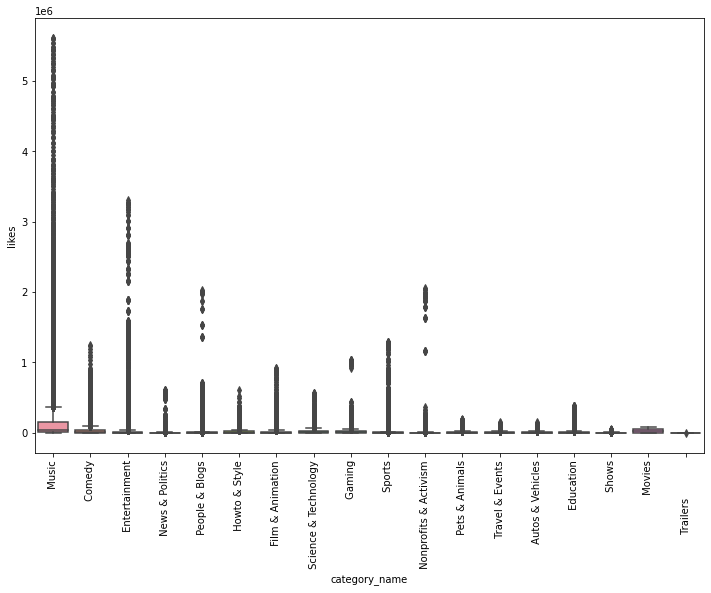

In [41]:
#plot distribution of every category vs likes
plt.figure(figsize=(12,8))
sns.boxplot(x="category_name",y="likes",data=fulldata)
plt.xticks(rotation=90)

In [42]:
#here we get rate of likes dislikes and comment count vs views
fulldata["like rate"]=((fulldata["likes"]/fulldata["views"])*100).round(2)
fulldata["dislike rate"]=((fulldata["dislikes"]/fulldata["views"])*100).round(2)
fulldata["comment_count rate"]=((fulldata["comment_count"]/fulldata["views"])*100).round(2)
fulldata

video_id trending_date  \
0      n1WpP7iowLc      17.14.11   
1      0dBIkQ4Mz1M      17.14.11   
2      5qpjK5DgCt4      17.14.11   
3      d380meD0W0M      17.14.11   
4      2Vv-BfVoq4g      17.14.11   
...            ...           ...   
40944  BZt0qjTWNhw      18.14.06   
40945  1h7KV2sjUWY      18.14.06   
40946  D6Oy4LfoqsU      18.14.06   
40947  oV0zkMe1K8s      18.14.06   
40948  ooyjaVdt-jA      18.14.06   

                                                   title  \
0            Eminem - Walk On Water (Audio) ft. BeyoncÃ©   
1                          PLUSH - Bad Unboxing Fan Mail   
2      Racist Superman | Rudy Mancuso, King Bach & Le...   
3                               I Dare You: GOING BALD!?   
4            Ed Sheeran - Perfect (Official Music Video)   
...                                                  ...   
40944                       The Cat Who Caught the Laser   
40945                         True Facts : Ant Mutualism   
40946  I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...   
40947                How Black Panther Should Have Ended   
40948  Official Call of DutyÂ®: Black Ops 4 âÂ Mult...   

                  channel_title  category_id              publish_time  \
0                    EminemVEVO           10  2017-11-10T17:00:03.000Z   
1                     iDubbbzTV           23  2017-11-13T17:00:00.000Z   
2                  Rudy Mancuso           23  2017-11-12T19:05:24.000Z   
3                      nigahiga           24  2017-11-12T18:01:41.000Z   
4                    Ed Sheeran           10  2017-11-09T11:04:14.000Z   
...                         ...          ...                       ...   
40944             AaronsAnimals           15  2018-05-18T13:00:04.000Z   
40945                  zefrank1           22  2018-05-18T01:00:06.000Z   
40946                Brad Mondo           24  2018-05-18T17:34:22.000Z   
40947  How It Should Have Ended            1  2018-05-17T17:00:04.000Z   
40948              Call of Duty           20  2018-05-17T17:09:38.000Z   

                                                    tags     views    likes  \
0      Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1      plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2      racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3      ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4      edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   
...                                                  ...       ...      ...   
40944  aarons animals|"aarons"|"animals"|"cat"|"cats"...   1685609    38160   
40945                                             [none]   1064798    60008   
40946  I gave safiya nygaard a perfect hair makeover ...   1066451    48068   
40947  Black Panther|"HISHE"|"Marvel"|"Infinity War"|...   5660813   192957   
40948      call of duty|"cod"|"activision"|"Black Ops 4"  10306119   357079   

       dislikes  ...                                  thumbnail_link  \
0         43420  ...  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1          1688  ...  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2          5339  ...  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3          1989  ...  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4         21082  ...  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   
...         ...  ...                                             ...   
40944      1385  ...  https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg   
40945       382  ...  https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg   
40946      1032  ...  https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg   
40947      2846  ...  https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg   
40948    212976  ...  https://i.ytimg.com/vi/ooyjaVdt-jA/default.jpg   

      comments_disabled  ratings_disabled  video_error_or_removed  \
0                 False             False                   False   
1              

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

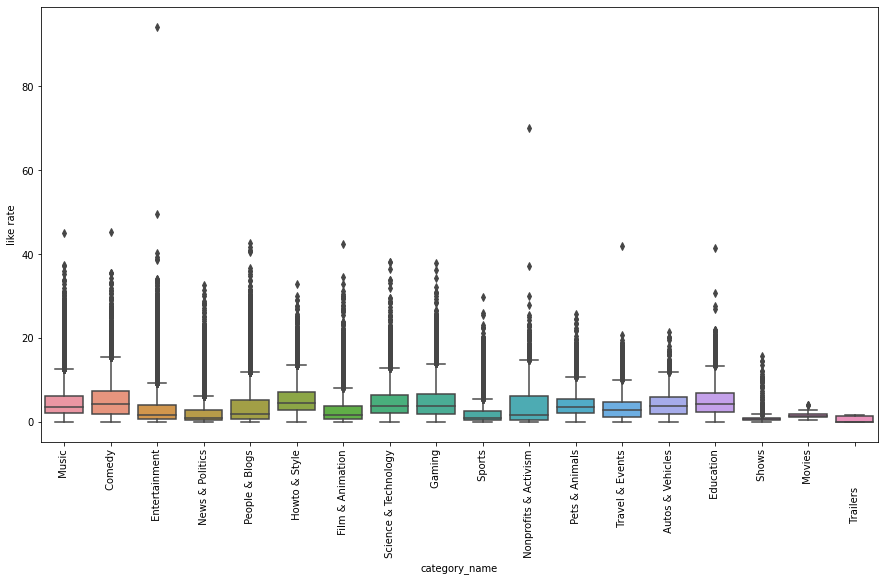

In [43]:
#here we plot box to see distribution of  rate of likes  vs category
plt.figure(figsize=(15,8))
sns.boxplot(x=fulldata["category_name"],y=fulldata["like rate"],data=fulldata)
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

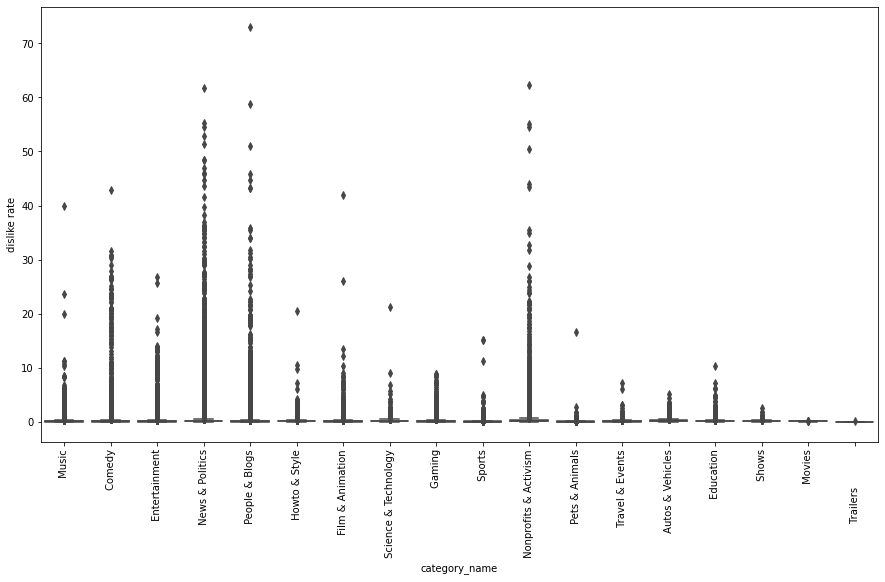

In [44]:
#here we plot box to see distribution of  rate of dislikes  vs category
plt.figure(figsize=(15,8))
sns.boxplot(x=fulldata["category_name"],y=fulldata["dislike rate"],data=fulldata)
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

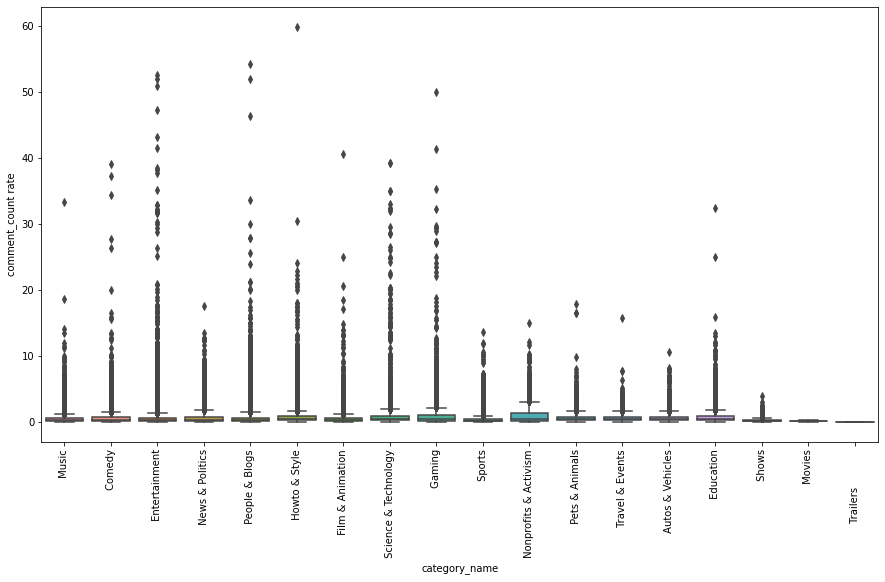

In [45]:
#here we plot box to see distribution of  rate of comment count  vs category
plt.figure(figsize=(15,8))
sns.boxplot(x=fulldata["category_name"],y=fulldata["comment_count rate"],data=fulldata)
plt.xticks(rotation=90)


<AxesSubplot:>

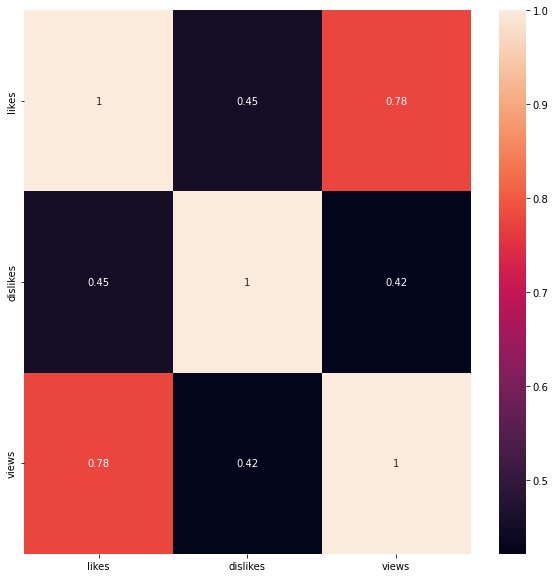

In [46]:
#correlation between likes dislikes and views
plt.figure(figsize=(10,10))
sns.heatmap(fulldata[["likes","dislikes","views"]].corr(),annot=True)

<AxesSubplot:xlabel='views', ylabel='likes'>

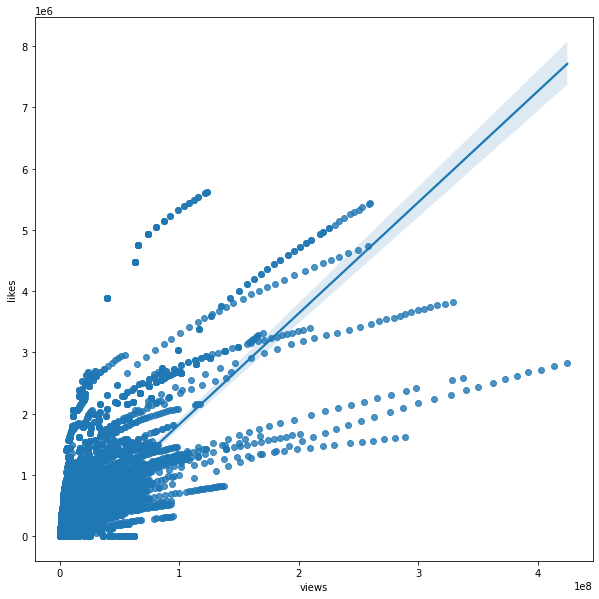

In [47]:
#regrsions plot btween views and likes it semi linaer as we see
plt.figure(figsize=(10,10))
sns.regplot(data=fulldata,x="views",y="likes")

# analysis tranding vedios 

In [48]:
fulldata.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'category_name',
       'like rate', 'dislike rate', 'comment_count rate'],
      dtype='object')

In [49]:
df_trand=fulldata.groupby("channel_title",)["video_id"].count().sort_values(ascending=False).to_frame().reset_index().rename(columns={"video_id":"total vedios"})
df_trand

channel_title  total vedios
0      The Late Show with Stephen Colbert           984
1                                     WWE           804
2             Late Night with Seth Meyers           773
3                               VikatanTV           763
4                            TheEllenShow           743
...                                   ...           ...
37819                   LIGHTS - 001 jrny             1
37820                          bangtanist             1
37821                      LIGAMX Femenil             1
37822             LIGA COLOMBIANA OFICIAL             1
37823                    Pavel Sidorik TV             1

[37824 rows x 2 columns]

In [50]:
#here we plot box to see distribution of  rate of likes  vs category
import plotly.express as px
px.bar(data_frame=df_trand[0:20],x="channel_title",y="total vedios")

# analysis punctions 

In [51]:
import string

string.punctuation
fulldata["title"]

0              Eminem - Walk On Water (Audio) ft. BeyoncÃ©
1                            PLUSH - Bad Unboxing Fan Mail
2        Racist Superman | Rudy Mancuso, King Bach & Le...
3                                 I Dare You: GOING BALD!?
4              Ed Sheeran - Perfect (Official Music Video)
                               ...                        
40944                         The Cat Who Caught the Laser
40945                           True Facts : Ant Mutualism
40946    I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...
40947                  How Black Panther Should Have Ended
40948    Official Call of DutyÂ®: Black Ops 4 âÂ Mult...
Name: title, Length: 375942, dtype: object

In [52]:
sample=fulldata[0:10000]
sample

video_id trending_date  \
0     n1WpP7iowLc      17.14.11   
1     0dBIkQ4Mz1M      17.14.11   
2     5qpjK5DgCt4      17.14.11   
3     d380meD0W0M      17.14.11   
4     2Vv-BfVoq4g      17.14.11   
...           ...           ...   
9995  vbiiik_T3Bo      18.03.01   
9996  PALcJ0HW1-I      18.03.01   
9997  SyQyPQpVPNs      18.03.01   
9998  NNwmF1HF4JY      18.03.01   
9999  RF7DhGIQE1k      18.03.01   

                                                  title  \
0           Eminem - Walk On Water (Audio) ft. BeyoncÃ©   
1                         PLUSH - Bad Unboxing Fan Mail   
2     Racist Superman | Rudy Mancuso, King Bach & Le...   
3                              I Dare You: GOING BALD!?   
4           Ed Sheeran - Perfect (Official Music Video)   
...                                                 ...   
9995  The End of the F**king World | Official Traile...   
9996           WALK IN THE WOODS WITH A LOGAN PAUL MEME   
9997    The part from Spy Kids that gave me nightmares.   
9998  Logan Paul and his friends laughing and smilin...   
9999  Zero | Title Announcement | Shah Rukh Khan | A...   

                   channel_title  category_id              publish_time  \
0                     EminemVEVO           10  2017-11-10T17:00:03.000Z   
1                      iDubbbzTV           23  2017-11-13T17:00:00.000Z   
2                   Rudy Mancuso           23  2017-11-12T19:05:24.000Z   
3                       nigahiga           24  2017-11-12T18:01:41.000Z   
4                     Ed Sheeran           10  2017-11-09T11:04:14.000Z   
...                          ...          ...                       ...   
9995                     Netflix           24  2018-01-01T15:30:03.000Z   
9996                   PewDiePie           23  2018-01-02T17:12:39.000Z   
9997                     Psychor           27  2017-12-30T13:49:09.000Z   
9998                   Jhb Memes           22  2018-01-02T01:05:09.000Z   
9999  Red Chillies Entertainment           24  2018-01-01T11:30:07.000Z   

                                                   tags     views    likes  \
0     Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1     plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2     racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3     ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4     edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   
...                                                 ...       ...      ...   
9995  Netflix|"Trailer"|"Netflix Original Series"|"N...   2824423    65817   
9996                                             [none]   2619160   235278   
9997              car|"crash"|"car accident"|"spy kids"    816799    16361   
9998  Logan Paul|"Logan Paul Dead Body"|"Logan Paul ...    878395     4252   
9999  Zero Teaser|"SRK"|"Shah Rukh Khan New Film 201...   8044843   205729   

      dislikes  ...                                  thumbnail_link  \
0        43420  ...  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1         1688  ...  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2         5339  ...  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3         1989  ...  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4        21082  ...  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   
...        ...  ...                                             ...   
9995      5212  ...  https://i.ytimg.com/vi/vbiiik_T3Bo/default.jpg   
9996     11429  ...  https://i.ytimg.com/vi/PALcJ0HW1-I/default.jpg   
9997       889  ...  https://i.ytimg.com/vi/SyQyPQpVPNs/default.jpg   
9998      6261  ...  https://i.ytimg.com/vi/NNwmF1HF4JY/default.jpg   
9999     12774  ...  https://i.ytimg.com/vi/RF7DhGIQE1k/default.jpg   

     comments_disabled  ratings_disabled  video_error_or_removed  \
0                False             False                   False   
1                False             False            

In [53]:
def len_punc(string_:str)->int:
    return len([c for c in string_ if c in string.punctuation])


In [54]:
sample["punc_len"]=sample["title"].apply(len_punc)

C:\Users\mo\AppData\Local\Temp\ipykernel_19520\2445117476.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
sample.head()


video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  ...  comments_disabled ratings_disabled  video_error_or_removed  \
0     43420  ...              False            False                   False   
1      1688  ...              False            False                   False   
2      5339  ...              False            False                   False   
3      1989  ...              False            False                   False   
4     21082  ...              False            False                   False   

                                         description  country   category_name  \
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...       CA           Music   
1  STill got a lot of packages. Probably will las...       CA          Comedy   
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...       CA          Comedy   
3  I know it's been a while since we did this sho...       CA   Entertainment   
4  ð§: https://ad.gt/yt-perfect\nð°: https://...       CA           Music   

  like rate dislike rate  comment_count rate  punc_len  
0      4.59         0.25                0.73         4  
1     12.59         0.17                1.28         1  
2      4.58         0.17                0.26         3  
3      6.31         0.09                0.84         3  
4      4.87         0.06                0.25         3  

[5 rows x 22 columns]

<AxesSubplot:xlabel='punc_len', ylabel='views'>

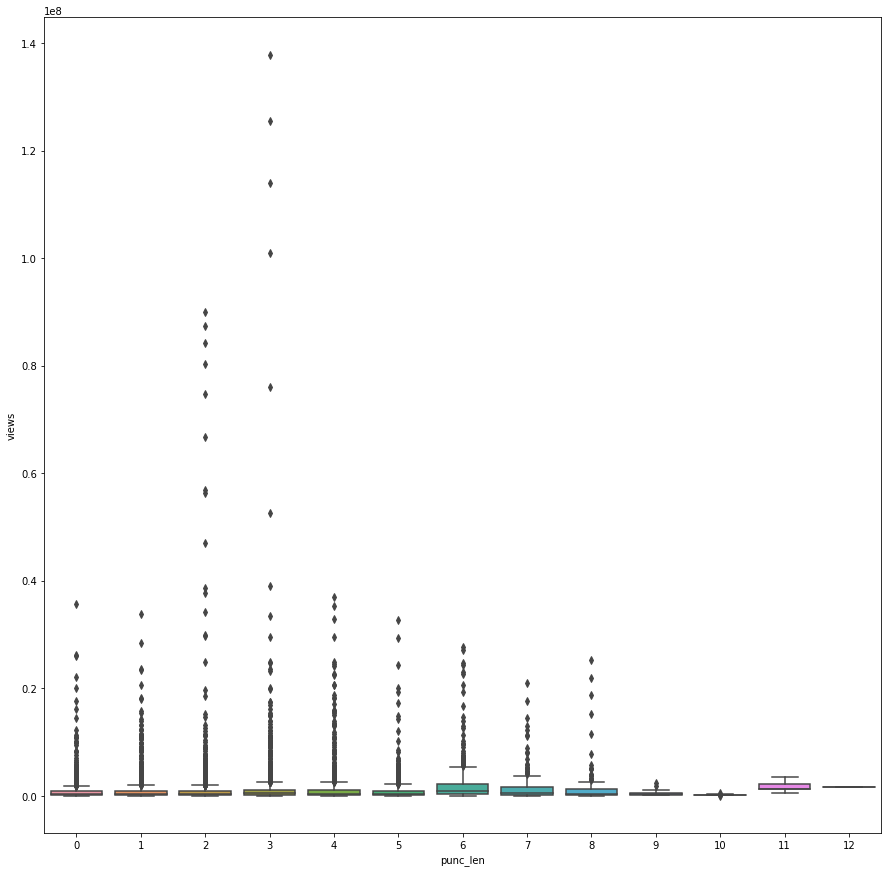

In [56]:
# plot distribution of punction  in views
plt.figure(figsize=(15,15))
sns.boxplot(data=sample,x="punc_len",y="views")


<AxesSubplot:xlabel='punc_len', ylabel='views'>

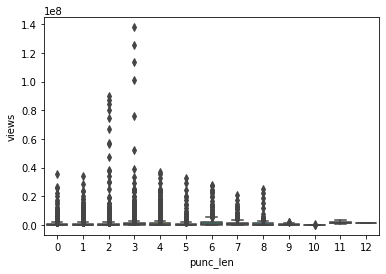

In [57]:
# plt.figure(figsize=(15,5))
sns.boxplot(x="punc_len",y="views",data=sample)